In [25]:
import requests 
import numpy as np
import pandas as pd
import os
import alpaca_trade_api as tradeapi
import datetime as dt
import pytz
from dotenv import load_dotenv
from MCForecastTools import MCSimulation
import json 

%matplotlib inline

In [26]:
load_dotenv()

True

In [27]:
btc = 1.2
eth = 5.3 

In [28]:
btcWeb = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
ethWeb = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [30]:
#Fetch Price BTC
btcInterWebs = requests.get(btcWeb).json()
btcPrice = btcInterWebs["data"]["1"]["quotes"]["USD"]["price"]

#Fetch Price ETH
ethInterWebs = requests.get(ethWeb).json()
ethPrice = ethInterWebs["data"]["1027"]["quotes"]["USD"]["price"]

#Current Value
btcVal = btc + btcPrice
ethVal = eth + ethPrice

#Wallet Balance
print(f"you currently have {btc} BTC with a value of ${btcVal:0.2f}")
print(f"you currently have {eth} BTC with a value of ${ethVal:0.2f}")

you currently have 1.2 BTC with a value of $36267.20
you currently have 5.3 BTC with a value of $2207.42


In [31]:
#Current Shares
my_agg = 200
my_spy = 50

In [35]:
#Alpaca Key & Secret
alpacaApi = os.getenv("ALPACA_API_KEY")
alpacaSecret = os.getenv("ALPACA_SECRET_KEY")

#Alpaca Object
alpaca = tradeapi.REST(
    alpacaApi, 
    alpacaSecret, 
    api_version="v2")

In [38]:
#Format Date (i changed the date to June 21 for more results)
date = pd.Timestamp("2021-6-21", tz="America/New_York").isoformat()

#Set Tickers
tick = ["AGG", "SPY"]

#Set Timeframe
timeframe = "1D"

#CLosing Prices
investments = alpaca.get_barset(
    tick,
    timeframe,
    start = date, 
    limit=1000
).df

#Preview
investments.head()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2021-06-21 00:00:00-04:00  115.06  115.120  114.9210  114.96  4934966  416.80   
2021-06-22 00:00:00-04:00  114.83  115.140  114.8300  115.11  5299846  420.85   
2021-06-23 00:00:00-04:00  115.06  115.138  114.9900  115.05  5000374  423.19   
2021-06-24 00:00:00-04:00  115.10  115.170  115.0450  115.07  6672880  424.89   
2021-06-25 00:00:00-04:00  115.11  115.130  114.7516  114.89  3987588  425.90   

                                                               
                               high     low   close    volume  
time                                                           
2021-06-21 00:00:00-04:00  421.0600  415.93  420.85  63727942  
2021-06-22 00:00:00-04:00  424.0000  420.08  423.06  50857233  
2021-06-23 00:00:00-04:00  424.0500  422.51  422.60  41476351  
2021-06-24 00:00:00-04:00  425.5500  424.62  425.09  39863529  
2021-06-25 00:00:00-04:00  427.0943  425.55  426.57  50460394

In [41]:
#Closing Prices
aggClose = float(investments["AGG"]["close"][0])
spyClose = float(investments["SPY"]["close"][0])

#Print Prices
print(f"the AGG closing price is: ${aggClose}")
print(f"the SPY closing price is: ${spyClose}")      

the AGG closing price is: $114.96
the SPY closing price is: $420.85


In [43]:
#Value of Shares
aggMine = my_agg * aggClose
spyMine = my_spy * spyClose

#PRINT
print(f"The current vlaue of your {my_agg} AGG shares is ${aggMine:0.2f}")
print(f"The current vlaue of your {my_spy} SPY shares is ${spyMine:0.2f}")

The current vlaue of your 200 AGG shares is $22992.00
The current vlaue of your 50 SPY shares is $21042.50


In [45]:
#Monthly Household Income
monInc = 5000

#Consolidate financial assets data
savings = [
    btcVal + ethVal, 
    aggMine + spyMine, 
]

#Savings Dataframe
savingsData = pd.DataFrame(savings, columns=["amount"], index=["crypto", "shares"])

#Display
display(savingsData)

,amount
crypto,38474.62
shares,44034.50


<AxesSubplot:title={'center':'Look Whats in My Piggy Bank!'}, ylabel='amount'>

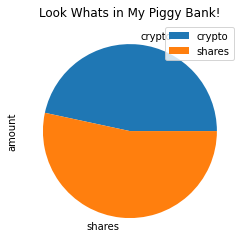

In [46]:
#3.14 Chart
savingsData.plot.pie(y="amount", title="Look Whats in My Piggy Bank!")

In [51]:
#Set emergency fund
emergency = monInc * 3

#Total Amount of Savings
totalSave = float(savingsData.sum())

#Validate Savings Health 
if totalSave > emergency:
    print("You finacially are safe, Order that pizza!")
elif totalSave == emergency:
    print("You're in the green, but keep saving")
else: 
    print("Maybe dont order out tonight")

You finacially are safe, Order that pizza!


In [56]:
#set the start and finish time
startDate = pd.Timestamp('2016-06-21', tz='America/New_York').isoformat()
endDate = pd.Timestamp('2021-06-21', tz='America/New_York').isoformat()

In [57]:
stockData = alpaca.get_barset(
    tick, 
    timeframe,  
    start=startDate,
    end=endDate,
    limit=1000
).df

stockData.head()

AGG                                        SPY  \
                             open      high     low   close   volume    open   
time                                                                           
2017-06-30 00:00:00-04:00  109.62  109.6273  109.46  109.49  2201175  242.26   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.01  109.08  1681516  242.91   
2017-07-05 00:00:00-04:00  109.08  109.1800  109.00  109.15  2694196  242.62   
2017-07-06 00:00:00-04:00  108.95  109.0000  108.82  108.95  2057393  241.88   
2017-07-07 00:00:00-04:00  108.89  108.9500  108.83  108.87  2536724  241.21   

                                                              
                             high      low   close    volume  
time                                                          
2017-06-30 00:00:00-04:00  242.71  241.575  241.77  50347309  
2017-07-03 00:00:00-04:00  243.38  242.290  242.32  27234078  
2017-07-05 00:00:00-04:00  243.01  241.700  242.77  41067682  
2017-07-06 00:00:00-04:00  242.03  240.340  240.58  52390161  
2017-07-07 00:00:00-04:00  242.28  241.020  242.10  36831437

In [65]:
#Calculating 30 years 
mcThirty = MCSimulation(
    portfolio_data = stockData, 
    weights = [.40,.60], 
    num_simulation = 500, 
    num_trading_days = 252 * 30
)
#PRINT
mcThirty.portfolio_data.head()

AGG                                     \
                             open      high     low   close   volume   
time                                                                   
2017-06-30 00:00:00-04:00  109.62  109.6273  109.46  109.49  2201175   
2017-07-03 00:00:00-04:00  109.30  109.3000  109.01  109.08  1681516   
2017-07-05 00:00:00-04:00  109.08  109.1800  109.00  109.15  2694196   
2017-07-06 00:00:00-04:00  108.95  109.0000  108.82  108.95  2057393   
2017-07-07 00:00:00-04:00  108.89  108.9500  108.83  108.87  2536724   

                                           SPY                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-06-30 00:00:00-04:00          NaN  242.26  242.71  241.575  241.77   
2017-07-03 00:00:00-04:00    -0.003745  242.91  243.38  242.290  242.32   
2017-07-05 00:00:00-04:00     0.000642  242.62  243.01  241.700  242.77   
2017-07-06 00:00:00-04:00    -0.001832  241.88  242.03  240.340  240.58   
2017-07-07 00:00:00-04:00    -0.000734  241.21  242.28  241.020  242.10   

                                                  
                             volume daily_return  
time                                              
2017-06-30 00:00:00-04:00  50347309          NaN  
2017-07-03 00:00:00-04:00  27234078     0.002275  
2017-07-05 00:00:00-04:00  41067682     0.001857  
2017-07-06 00:00:00-04:00  52390161    -0.009021  
2017-07-07 00:00:00-04:00  36831437     0.006318

In [67]:
mcThirty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999219,1.004764,1.001709,1.002347,1.005909,0.999820,1.003674,0.992227,0.998955,0.995883,...,1.002452,1.001370,0.988298,1.009931,0.996312,0.980001,0.999497,0.998395,0.999709,0.990876
2,0.987001,1.003747,1.006292,1.001046,1.010784,0.998425,1.007438,0.995174,1.005061,0.986323,...,0.995533,1.015238,0.981197,1.021685,0.998596,0.988567,1.014438,0.994004,1.010348,1.001052
3,0.975612,1.014971,1.011272,1.001376,1.009598,0.996392,1.011010,0.994689,1.008763,0.986225,...,1.000404,1.025273,0.976890,1.018981,1.003497,0.989838,1.019039,0.992119,1.015868,1.004616
4,0.965473,1.019508,1.008618,0.989859,1.012752,0.989611,1.011786,0.976461,1.013541,0.977867,...,0.990544,1.007971,0.977397,1.011171,0.984768,0.977376,1.018240,0.992690,1.024060,1.005492
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.311019,32.797205,7.843663,22.391340,13.148146,15.729814,40.789649,18.322688,17.569837,21.257921,...,29.430462,11.063529,9.629271,14.993713,33.651035,38.243579,7.238115,13.890867,6.742582,12.620364
7557,8.229500,32.590534,7.820084,22.423916,13.243704,16.002910,41.048010,18.190322,17.551080,21.269506,...,29.432772,10.975504,9.567744,15.064283,33.786489,38.632241,7.223869,13.847018,6.829836,12.520941
7558,8.258831,32.724740,7.865271,22.531857,13.357301,15.875897,40.571212,18.170137,17.650806,21.606289,...,29.495592,10.972326,9.512971,14.860801,33.770898,38.928793,7.285486,13.873958,6.879247,12.674227
7559,8.433236,32.874159,7.873071,22.628248,13.381386,15.853027,40.565879,18.040420,17.536620,21.607909,...,29.607785,11.054248,9.492786,14.912580,33.966051,39.449820,7.268317,13.932946,6.898076,12.850965


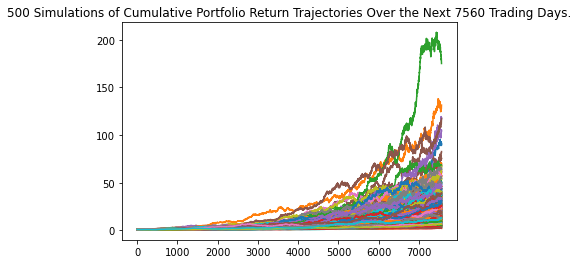

In [68]:
linePlot = mcThirty.plot_simulation()

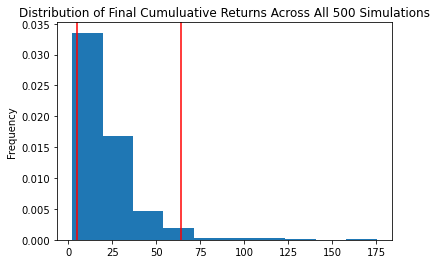

In [69]:
distPlot = mcThirty.plot_distribution()

In [70]:
#Summany Statistics
table = mcThirty.summarize_cumulative_return()
#P R I N T
print(table)

count           500.000000
mean             21.562666
std              17.837763
min               2.204156
25%              10.418058
50%              16.841551
75%              26.401354
max             175.141465
95% CI Lower      5.026240
95% CI Upper     63.887082
Name: 7560, dtype: float64


In [74]:
#Initial Investment
initInves = 20000

ciLower = round(table[8] * initInves,2)
ciUpper = round(table[9] * initInves,2)

print(f"there is a high chance your initial investment of ${initInves} in the portfolio"
     f" over the next 30 years will end within a range of"
     f" ${ciLower:0.2f} and ${ciUpper:0.2f}")

there is a high chance your initial investment of $20000 in the portfolio over the next 30 years will end within a range of $100524.80 and $1277741.63


In [75]:
#Initial Investment
initInves = 20000 * 1.5

ciLower = round(table[8] * initInves,2)
ciUpper = round(table[9] * initInves,2)

print(f"there is a high chance your initial investment of ${initInves} in the portfolio"
     f" over the next 30 years will end within a range of"
     f" ${ciLower:0.2f} and ${ciUpper:0.2f}")

there is a high chance your initial investment of $30000.0 in the portfolio over the next 30 years will end within a range of $150787.21 and $1916612.45
